# Neural Networks

__History__
- introduced around 1940
- 1960 break
- 1980 started again
- 1990 break
- 2010 huge impprovement
    - data
    - computational power  (GPU cards)
    - theoretical improvements


## Deep Learning (DL)
- DL is a subset of ML
- works similar to the human brain (nerve)

- Some applications:
    - autonomous vehicles
    - real-time translation
    - Google’s Deep Learning based AlphaGo beating the best Go player in the world,

- NN are inspired by the structure of the cerebral cortex.
    - At the basic level is the perceptron, the mathematical representation of a biological neuron.
    - Like in the cerebral cortex, there can be several layers of interconnected perceptrons.
    - Input values, or in other words our underlying data, get passed through this “network” of hidden layers until they eventually converge to the output layer.
    - The output layer is our prediction: it might be one node if the model just outputs a number, or a few nodes if it’s a multiclass classification problem.
    - The hidden layers of a NN perform modifications on the data to eventually feel out what its relationship with the target variable is.
    - Each node has a weight, and it multiplies its input value by that weight. Do that over a few different layers, and the Net is able to essentially manipulate the data into something meaningful.
    - To figure out what these small weights should be, we typically use an algorithm called Backpropagation.


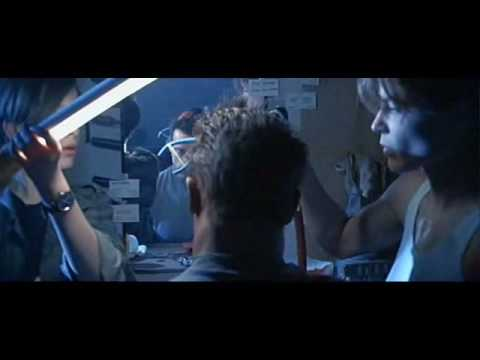

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('wrDo7wVXrBQ', width=800, height=300, start=65)

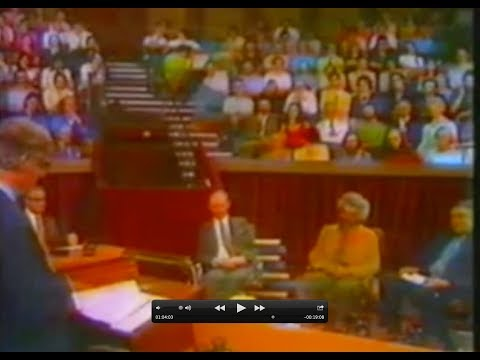

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('03p2CADwGF8', width=800, height=300)

![](pict/nn_types.png)

## Perceptron
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

- A **perceptron** is an algorithm used for supervised learning of binary classifiers.

- A perceptron is a single-layer neural network (an artificial neuron) that does certain computations to detect features or business intelligence in the input data.


- The perceptron algorithm learns the weights for the input signals in order to draw a linear decision boundary. It consists of four main parts:
    - input values,
    - weights and bias,
    - net sum  
    - an activation function.
    
    
**How does a perceptron work?**
- The process begins by taking all the input values and multiplying them by their weights.
- Then, all of these multiplied values are added together to create the weighted sum.
- The weighted sum is then applied to the activation function, producing the perceptron's output.
- The activation function plays the integral role of ensuring the output is mapped between required values.
- It is important to note that the weight of an input is indicative of the strength of a node.


![](pict/perceptron.png)

## MLP
- A perceptron is always feedforward, that is, all the arrows are going in the direction of the output.
- Neural networks in general might have loops, and if so, are often called recurrent networks.
- A recurrent network is much harder to train than a feedforward network.
- Artificial neural network, which has input layer, output layer, and two or more trainable weight layers (hidden layers) constisting of perceptrons is called **multilayer perceptron**

- __Lower Layers:__ Close to input layer
- __Upper Layers:__ Close to output layer


- Input Layer: accepts data as input to build the NN
- Hidden Layers: complex operations and feature extraction
- Output Layer: generate the predicted value(s)

- Lower level hidden layers: low-level structuyres (line segments, orientation)
- Middle level hidden layers: intermediate level structures (rectangles, circles)
- Upper level hidden layers: complex structures (face)

![](pict/mlp.png)

![](pict/mlp_2_hidden.jpg)


## Activation functions
- The activation function applies a step rule (convert the numerical output into +1 or -1) to check if the output of the weighting function is greater than zero or not.
- Derivative of step function is zero
- It is easy and fast to compute the derivative of Relu (Rectified Linear Unit)
    - default activation function for hidden layers
- Some most used activation functions are:





![](pict/activation.png)

## sklearn Perceptron

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X = load_breast_cancer().data
y = load_breast_cancer().target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [4]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.8497652582159625, 0.8531468531468531)

In [5]:
clf.intercept_

array([253.])

In [6]:
clf.coef_.shape

(1, 30)

In [7]:
# actual output
y_test[:5]

array([0, 1, 1, 1, 1])

In [8]:
# predicted classes
clf.predict(X_test[:5])

array([1, 1, 1, 1, 1])

In [9]:
clf.score(X_train, y_train)

0.8497652582159625

In [10]:
clf.score(X_test, y_test)

0.8531468531468531

## sklearn MLP

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X = fetch_california_housing().data
y = fetch_california_housing().target

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=0)

In [12]:
X.shape

(20640, 8)

In [13]:
fetch_california_housing().feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(random_state=0, hidden_layer_sizes=[10,20], activation='relu', max_iter=1000, verbose=True)
reg.fit(X_train, y_train)
reg.score(X_train, y_train), reg.score(X_test, y_test)

Iteration 1, loss = 52.52882975
Iteration 2, loss = 1.32529916
Iteration 3, loss = 1.01549794
Iteration 4, loss = 0.93165872
Iteration 5, loss = 0.86093486
Iteration 6, loss = 0.79990589
Iteration 7, loss = 0.73403636
Iteration 8, loss = 0.69788625
Iteration 9, loss = 0.67321340
Iteration 10, loss = 0.65785799
Iteration 11, loss = 0.66388045
Iteration 12, loss = 0.64232088
Iteration 13, loss = 0.63543710
Iteration 14, loss = 0.62684449
Iteration 15, loss = 0.62159136
Iteration 16, loss = 0.62216359
Iteration 17, loss = 0.61531925
Iteration 18, loss = 0.61137555
Iteration 19, loss = 0.60772535
Iteration 20, loss = 0.60979898
Iteration 21, loss = 0.59862956
Iteration 22, loss = 0.59582040
Iteration 23, loss = 0.59304742
Iteration 24, loss = 0.59030457
Iteration 25, loss = 0.58986838
Iteration 26, loss = 0.58471890
Iteration 27, loss = 0.57564664
Iteration 28, loss = 0.56661063
Iteration 29, loss = 0.56876346
Iteration 30, loss = 0.55680836
Iteration 31, loss = 0.56158242
Iteration 32, lo

(0.5686693538646728, 0.553300884080113)

In [16]:
len(reg.coefs_)

3

In [17]:
reg.coefs_[0].shape

(8, 10)

In [18]:
reg.coefs_[1].shape

(10, 20)

In [19]:
reg.coefs_[2].shape

(20, 1)

In [20]:
[i.shape for i in reg.coefs_]

[(8, 10), (10, 20), (20, 1)]

In [21]:
len(reg.intercepts_), reg.intercepts_[0].shape, reg.intercepts_[1].shape

(3, (10,), (20,))

In [22]:
len(reg.coefs_), reg.coefs_[0].shape, reg.coefs_[1].shape

(3, (8, 10), (10, 20))

In [23]:
reg.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': [10, 20],
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [24]:
reg.predict(X_train)[:6]

array([3.03326133, 2.90979905, 1.29352856, 2.88241277, 1.2781484 ,
       3.08224869])

## Tensorflow


- TensorFlow (TF) is a free and open-source software library for machine learning developed by Google

- Supports NN and classical ML algorithms

- Originally developed to run large numerical computations

- Data is in the form of tensors (multi dimensional array)

- Execution is in the form of graphs

- It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

- Some examples: TF can train and run deep neural networks for
    - handwritten digit classification,
    - image recognition,
    - word embeddings,
    - recurrent neural networks,
    - sequence-to-sequence models for machine translation,
    - natural language processing,

![](pict/tensorflow.png)

## Keras

- Keras is a high-level library that’s built on top of Theano or TensorFlow.
- It provides a scikit-learn type API (written in Python) for building Neural Networks.
- Developers can use Keras to quickly build neural networks without worrying about the mathematical aspects of tensor algebra, numerical techniques, and optimization methods.
- You can build, train, evaluate and execute models
- You can use Tensorflow or Teano as the computation backend.
- Tenserflow is bundled with its own Keras: tf.keras
- Facebook's Pytorch library is also very popular. (similar to Keras)



https://www.tensorflow.org/api_docs/python/tf/keras
https://keras.io/api/

In [25]:
import tensorflow as tf
from tensorflow import keras

### binary classification

In [26]:
X = load_breast_cancer().data
y = load_breast_cancer().target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [27]:
# breast cancer dataset: output binary(0,1)
model = keras.models.Sequential([
keras.layers.Input( shape= (30,) ), # input layer
keras.layers.Dense( 10, activation='relu' ),     # hiddenlayer-I
keras.layers.Dense( 20, activation='relu' ),     # second hidden layer
keras.layers.Dense( 1, activation='sigmoid' ),      # output layer
])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model = keras.models.Sequential([
keras.layers.Dense(40, activation='relu', input_shape=X_train.shape[1:], name='first_dense'),
keras.layers.Dense( 1, activation='sigmoid')  ])

model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

model.evaluate(X_test, y_test)

/Users/yusufdanisman/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.6208 - loss: 0.6654


[0.6600056886672974, 0.6293706297874451]

### regression

In [30]:
from sklearn.datasets import fetch_california_housing
X = fetch_california_housing().data
y = fetch_california_housing().target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [31]:
model = keras.models.Sequential([
keras.layers.Dense(50, activation='relu', input_shape=X_train.shape[1:], name='first_dense'),
# keras.layers.Dense(2, activation='relu'),
keras.layers.Dense(1)  ])

model.compile(loss="mse", optimizer="adam")
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 181us/step - loss: 0.7016


0.6884835958480835

In [32]:
from sklearn.metrics import r2_score
y_test_predict = model.predict(X_test)
r2_score(y_test_predict , y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step


0.11007865934764349

In [33]:
y_train_predict = model.predict(X_train)
r2_score(y_train_predict , y_train)

484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 160us/step


0.15041640623929764

### Multiclass

In [34]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,))

In [35]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

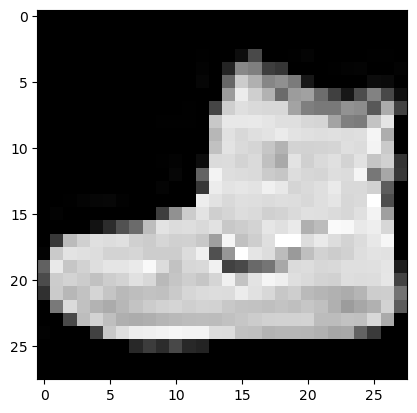

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], 'gray');

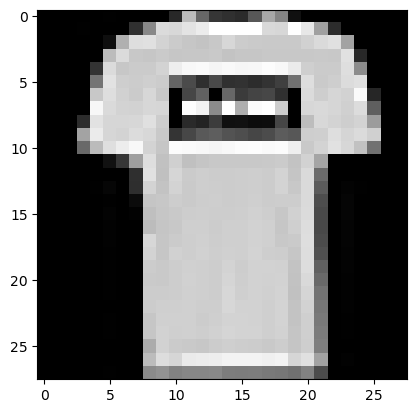

In [38]:
plt.imshow(X_train[1], 'gray');

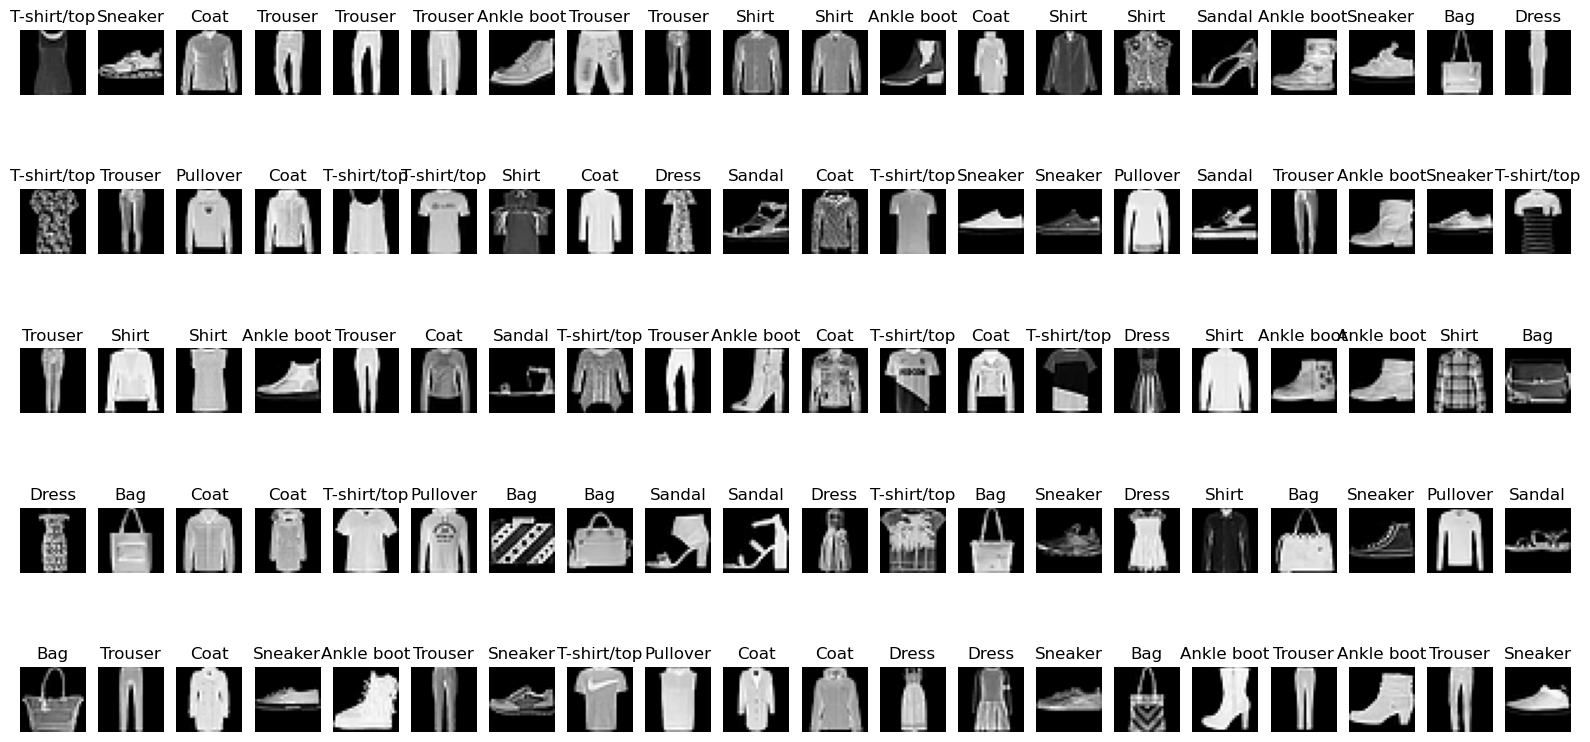

In [39]:
import random
N = 5
M = 20
plt.figure(figsize=(20,10))
for i in range(1,N*M+1):
    plt.subplot(N,M,i)
    ind  = random.randint(1,X_train.shape[0])
    plt.imshow(X_train[ind], 'gray')
    plt.title(class_labels[y_train[ind]])
    plt.axis('off');

In [40]:
from collections import Counter
Counter(y_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

In [41]:
Counter(y_test)

Counter({9: 1000,
         2: 1000,
         1: 1000,
         6: 1000,
         4: 1000,
         5: 1000,
         7: 1000,
         3: 1000,
         8: 1000,
         0: 1000})

In [48]:
# whole process
import numpy as np
model = keras.models.Sequential([
   keras.layers.Input( shape=[28,28]), 
   keras.layers.Flatten(),
   keras.layers.Dense( 300, activation='relu'),
   keras.layers.Dense( 50, activation='relu'),
   keras.layers.Dense( 10, activation='softmax') ])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, verbose=0)

In [49]:
x = X_test[4].reshape(1,28,28)
print(np.argmax(model.predict(x), axis=-1))
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[5.0401051e-02, 2.4868278e-03, 4.4423324e-01, 2.5131801e-02,
        1.2353220e-01, 3.6587447e-03, 3.2984415e-01, 3.9137286e-04,
        1.9769039e-02, 5.5166503e-04]], dtype=float32)

In [50]:
y_test_pred = [np.argmax(i) for i in model.predict(X_test)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_pred, y_test)

0.7855